<a href="https://colab.research.google.com/github/nikopetrocelli/489Proj2-Petrocelli/blob/master/petrocelli_stat696_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Captain Niko Petrocelli
# STAT 696
# HW 4

Chapter 12 problems:
* 12.2,
(answered)
* 12.5,
(answered)
* 12.9,
(answered)
* 12.10,

* 12.11,

* 12.12



Chapter 4 problems:

* 4.5,

* 4.9,

* 4.20


# Problem 12.2:
Refer to Plastic hardness Problem 1.22. If the same test item were measured at 12 different points in time, would the errorterms in the regression model likely be autocorrelated? Discuss.




## Answer 12.2:
Yes, because the problem now includes time series data. The error terms are frequently correlated positively over time in this type of data. Error terms correlated over time are considered to be autocorrelated. This is often due to omission of some of the key variables that are positively correlated which in turn make the error terms in the regression model tend to be possitively autocorrelated, since the error terms will capture some of the effects of the missing variables. In the case of the plastic hardness problem, taking the same test item at 12 different points in time could lead to things like temperature variance, or different environmental considerations that may lead to the error terms becoming positively auotcorrelated because the effect of temperature or environmental factors are likely posiitvely correlated over time.

# Problem 12.5:

For each of the following tests concerning the autocorrelation parameter $\rho $ in regression model (12.2) with three predictor variables state the appropriate decision rule based on the Durbin-Watson test statistic for a sample of size $38: (1) H_0: ρ = 0, H_a: ρ \not = 0, α = .02;
(2) H_0: ρ = 0, H_a: ρ < 0, \alpha = .05: (3) H_0 : \rho = 0, H_a: \rho > 0, \alpha = .01. $

## Answer 12.5:

The DW test stat $D$ is obtained by using ordinary least squares to fit the regression function, calculating the ordinary residuals: $ e_t = Y_t -\hat Y_t $ and then calculing the test statistic:  
$ D = \frac{\sum\limits_{t=2}^n(e_t-e_{t-1})^2}{\sum\limits_{t=2}^ne_t^2} $  
DW obtained upper bounds, $d_u$ and lower bounds $d_l$, such that a $D$ outside of these pbounds allows for a decision, such that:

* If $ D>d_u$, conclude $H_0$
* If $ D<d_l$, conclude $H_a$
* If $ d_l \leq D \leq d_u $, the test is inconclusive
* If negative autocorrelation use $4-D$ instead of $D$

Using table B.7:

1. $H_0: ρ = 0, H_a: ρ \not = 0, α = .02$  
    * At $(p-1 = 3), \quad d_l = 1.12 \quad d_u = 1.45$
    * For positive autocorrelation: if $D > 1.45$ conclude $H_0$
    * For negative autocorrelation: if $4 - D >1.45$ conclude $H_0$
    * For positive autocorrelation: if $D < 1.12 $ conclude $H_a$
    * For negative autocorrelation: if $4-D < 1.12 $ conclude $H_a$
    * Otherwise inconclusive test.
2. $H_0: ρ = 0, H_a: ρ < 0, \alpha = .05$
    * At $(p-1 = 3), \quad d_l = 1.32 \quad d_u = 1.66$
    * For negative autocorrelation: if $4 - D >1.66$ conclude $H_0$
    * For negative autocorrelation: if $4-D < 1.32 $ conclude $H_a$
    * Otherwise inconclusive test.
3. $ H_0 : \rho = 0, H_a: \rho > 0, \alpha = .01$
    * At $(p-1 = 3), \quad d_l = 1.12 \quad d_u = 1.45$
    * For positive autocorrelation: if $D > 1.45$ conclude $H_0$
    * For positive autocorrelation: if $D < 1.12 $ conclude $H_a$
    * Otherwise inconclusive test.




# Problem 12.9:

A staff analyst for a manufacturer of microcomputer components has compiled monthly data for the past 16 months on the value of industry production of
processing units that use these components ($X$, in million dollars) and the value of the firm's components used ($Y$. in thousand dollars). The analyst believes that a simple linear regression relation is appropriate but anticipates positive autocorrelation. The data follow: (file:Ch12pr09_MicrocompterComponents)


## (a)
Fit a simple linear regression model by ordinary least squares and obtain the residuals. Also obtain $s\{\beta_0\}$ and $s\{\beta_1\}$.

In [24]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math


import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag

from statsmodels.stats.stattools import durbin_watson

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# !pip install pingouin
# import pingouin as p

In [4]:
datFolder = 'Data'
filename = 'Ch12pr09_MicrocompterComponents.csv'
data_path = os.path.join(os.getcwd() , datFolder, filename)
df = pd.read_csv(data_path)
df.head()

,Y,X
0,102.9,2.052
1,101.5,2.026
2,100.8,2.002
3,98.0,1.949
4,97.3,1.942


In [5]:
model = smf.ols('Y ~ X', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           3.82e-10
Time:                        19:01:43   Log-Likelihood:                -20.886
No. Observations:                  16   AIC:                             45.77
Df Residuals:                      14   BIC:                             47.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.7385      7.175     -1.079      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
print(f"Slope Standard Error: {model.bse['X']}")
print(f"Intercept Standard Error: {model.bse['Intercept']}")

Slope Standard Error: 3.5196716413618274
Intercept Standard Error: 7.174638751741572


### Solution

The code above shows the model takes the form $ \hat Y = -7.7385 + 53.9533X $ and $s\{\beta_0\} = 7.174638751741572, \quad s\{\beta_1\} =3.5196716413618274 $

## (b)

Plot the residuals against time and explain whether you find any evidence of positive autocorrelation.

In [16]:
residuals = model.resid
print(f"residuals are: {np.array(residuals)}")
time=np.linspace(1, len(residuals), len(residuals))
print(f"times are: {np.array(time)}")

residuals are: [-0.07368933 -0.07090311  0.52397648  0.58350225  0.26117547 -0.57139213
 -1.91277045 -0.82764265 -0.67135515  0.93515837  1.80259077  0.49468414
  0.94351704  0.31561781 -0.67135515 -1.06111434]
times are: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


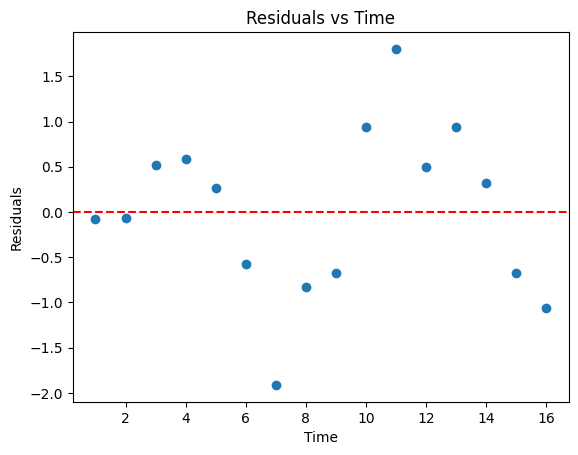

In [20]:
plt.scatter(time, residuals)
plt.title('Residuals vs Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(y=0, linestyle="--", color='r')
plt.show()

### Solution

Yes, I see evidence of positive autocorrelation due to the cyclical behavior of my error terms.

## (c)
Conduct a forrual test for positive autocorrelation using $\alpha = .05$. State the alternatives, decision rule, and conclusion. Is the residual analysis in part (b) in accord with the test result?


### Solution
First from table B.7 for $\alpha=.05$ and $n=16, \quad p-1=1$ we get $d_l = 1.10, \quad d_u=1.37$ leveraging the same rules we followed in problem 12.5 (and only searching for positive correlation):

$ H_0 : ρ=0, \quad H_a : \rho  >0 , \quad \alpha = .05$

* If $ D>d_u$, conclude $H_0$
* If $ D<d_l$, conclude $H_a$
* If $ d_l \leq D \leq d_u $, the test is inconclusive
* If negative autocorrelation use $4-D$ instead of $D$

In [23]:
d_l = 1.10
d_u = 1.37
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

if dw_stat > d_u:
  print(f"Conclude H0")
elif dw_stat < d_l:
  print(f"Conclude Ha")
else:
  print(f"Inconclusive")

Durbin-Watson Statistic: 0.8566023880687499
Conclude Ha


Therefore we conclude $H_a$ that positive autocorrelation exists. Yes, this is exactly in accordance with my residual analysis from part (b).